In [15]:
from keras.preprocessing.image import ImageDataGenerator
import os

main_dir = '..\\dataset'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
val_dir = os.path.join(main_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 18

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')

Found 1929 images belonging to 10 classes.
Found 287 images belonging to 10 classes.
Found 548 images belonging to 10 classes.


In [16]:
for data_batch, label_batch in train_gen:
    print('Data batch shape:', data_batch.shape)
    print('Label batch shape:', label_batch.shape)
    break

Data batch shape: (18, 100, 100, 1)
Label batch shape: (18, 10)


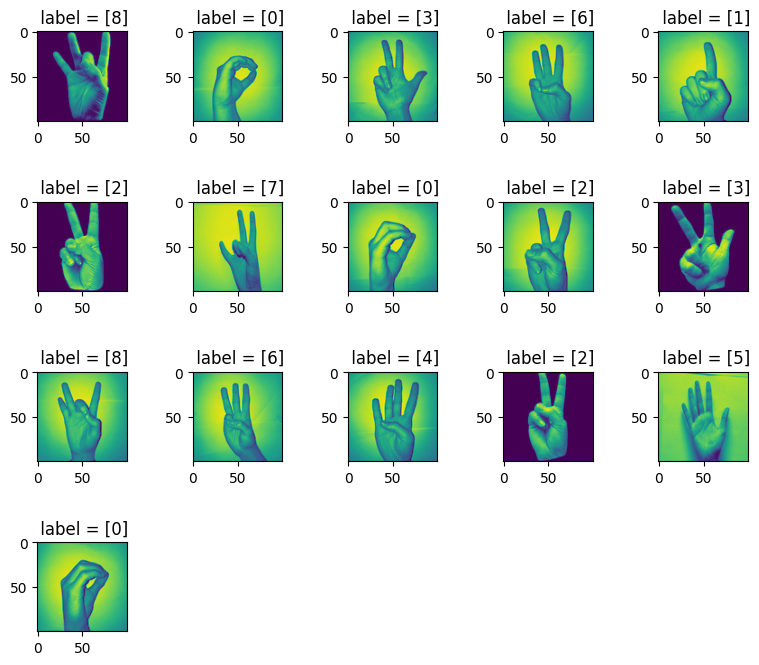

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 17):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=0.9, wspace=0.01)
    label = np.where(label_batch[i] == 1)
    ax.title.set_text(" label = " + str(label[0]))
    plt.imshow(img)
plt.show()

In [18]:
# Batch parameters

train_filenames = train_gen.filenames
train_count = len(train_filenames)

val_filenames = val_gen.filenames
val_count = len(val_filenames)

test_filenames = test_gen.filenames
test_count = len(test_filenames)

train_spe =  int(train_count / batch_size)
val_spe = int(val_count / batch_size)
test_spe = int(test_count / batch_size)

In [19]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Conv2D(32, (4,4), activation='relu', input_shape=(100, 100, 1)))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Conv2D(64, (4,4), activation='relu'))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        544       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30976)             0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [20]:
from keras import optimizers

network.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

history = network.fit(train_gen,
                      steps_per_epoch=train_spe,
                      epochs=9,
                      validation_data=val_gen,
                      validation_steps=val_spe)

Epoch 1/9
107/107 [==============================] - 22s 198ms/step - loss: 1.7309 - accuracy: 0.5233 - val_loss: 0.6094 - val_accuracy: 0.7852
Epoch 2/9
107/107 [==============================] - 21s 195ms/step - loss: 0.5228 - accuracy: 0.8331 - val_loss: 0.4840 - val_accuracy: 0.8352
Epoch 3/9
107/107 [==============================] - 21s 195ms/step - loss: 0.2631 - accuracy: 0.9199 - val_loss: 0.3491 - val_accuracy: 0.8852
Epoch 4/9
107/107 [==============================] - 21s 194ms/step - loss: 0.1400 - accuracy: 0.9618 - val_loss: 0.4091 - val_accuracy: 0.8870
Epoch 5/9
107/107 [==============================] - 21s 195ms/step - loss: 0.0718 - accuracy: 0.9796 - val_loss: 0.3677 - val_accuracy: 0.9074
Epoch 6/9
107/107 [==============================] - 21s 194ms/step - loss: 0.0699 - accuracy: 0.9880 - val_loss: 0.4911 - val_accuracy: 0.9019
Epoch 7/9
107/107 [==============================] - 21s 194ms/step - loss: 0.0408 - accuracy: 0.9948 - val_loss: 0.5060 - val_accuracy:

In [12]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print('Train Accuracy:\n', train_accuracy)
print('\nValidation Accuracy:\n', val_accuracy)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
print('\nTrain Loss:\n', train_loss)
print('\nValidation Loss:\n', val_loss)

epochs = range(1,len(train_accuracy)+1)

Train Accuracy:
 [0.5667189955711365, 0.8681318759918213, 0.9382522106170654, 0.958660364151001, 0.982208251953125, 0.9926739931106567, 0.9905808568000793, 0.9963369965553284, 0.9921507239341736]

Validation Accuracy:
 [0.8092592358589172, 0.8629629611968994, 0.885185182094574, 0.8703703880310059, 0.9018518328666687, 0.894444465637207, 0.8870370388031006, 0.8907407522201538, 0.8999999761581421]

Train Loss:
 [1.4531079530715942, 0.415634423494339, 0.20392847061157227, 0.14979662001132965, 0.08711931854486465, 0.017473919317126274, 0.03966012969613075, 0.014744719490408897, 0.01690252684056759]

Validation Loss:
 [0.557748019695282, 0.4258432388305664, 0.43859803676605225, 0.4513333737850189, 0.43421101570129395, 0.6004154086112976, 0.6327193379402161, 0.5721541047096252, 0.6578603386878967]


In [13]:
test_loss, test_accuracy = network.evaluate(test_gen, steps=test_spe)

15/15 [==============================] - 0s 23ms/step - loss: 0.6173 - accuracy: 0.9037


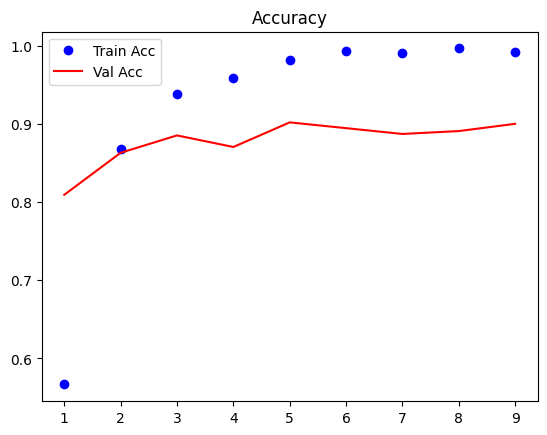

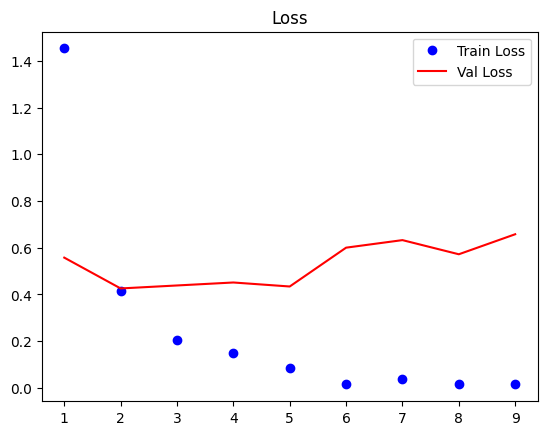

In [14]:
plt.plot(epochs, train_accuracy, 'bo', label='Train Acc')
plt.plot(epochs, val_accuracy, 'r', label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 46ms/step


First layer feature maps:


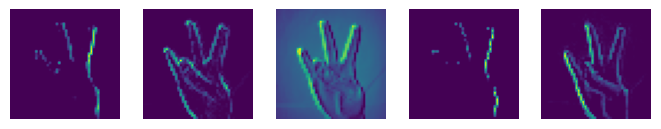

1/1 [==============================] - 0s 61ms/step


Second layer feature maps:


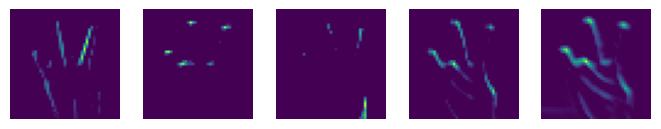

In [41]:
# Visualising the CNN

layer_output = network.layers[1].output

# Create a new model that returns the output of the first convolutional layer
temp_model = models.Model(inputs=network.input, outputs=layer_output)

# Get the feature maps of the first convolutional layer
feature_maps = temp_model.predict(data_batch)

# Plot the feature maps
print("\n\nFirst layer feature maps:")
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(6, 6, i+1)
    plt.imshow(feature_maps[0, :, :, i])
    plt.axis('off')
plt.show()

layer_output = network.layers[2].output

# Create a new model that returns the output of the first convolutional layer
temp_model = models.Model(inputs=network.input, outputs=layer_output)

# Get the feature maps of the first convolutional layer
feature_maps = temp_model.predict(data_batch)

# Plot the feature maps
print("\n\nSecond layer feature maps:")
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(6, 6, i+1)
    plt.imshow(feature_maps[0, :, :, i])
    plt.axis('off')
plt.show()